# 课程项目一 几种重要的非线性回归模型
-----
* **顾翔 921127940122**
* **概述**：回归分析是一种通过建立模型来研究变量之间相互关系的密切程度、结构状态及进行模型预测的有效工具, 在工商管理、经济、社会、医学和生物学等领域应用十分广泛. 课程中我们讲述了线性回归模型, 包含Lasso、岭回归及最小二乘. 在实际的回归分析中, 很多数据中输入特征和目标特征并非呈现线性关系. 此时, 简单的线性回归并不能很好地拟合数据. 本项目重点关注几种常用的非线性回归模型.


* **对于环境及文件的说明**：
    1. 全文使用JupyterNotebook编写，文字阐述使用markdown编写，代码使用python 3.8.8编译。
    2. 部分重要文件解释：
   
    |文件名|内容|
    |:--|:---|
    |正式版.ipynb |源文件，包含了markdown书写的文字声明和python程序源码，请使用JupyterNotebook打开，或VScode（不推荐）查看|
    |几种重要的非线性回归模型.docx |汇报文件，内容与正式版.ipynb一致|
    |局部多项式回归草稿本.ipynb|草稿本，里面包含一部分绘图代码，用于生成在正式版中使用到的图片|
    |样条回归草稿本.ipynb|草稿本，里面包含一部分绘图代码，用于生成在正式版中使用到的图片|
    |readme.md|上传github作为项目介绍，内容与正式版.ipynb相同| 
    
    
* **加分项完成情况汇报**
    1. 所有内容上传至GitHub，项目地址为：https://github.com/eminentgu/Non-linear_Regression
    2. 题目一使用局部多项式回归完成，未调包。题目二使用MARS库sklearn-contrib-py-earth辅助完成
   
   
* **参考与引用**
    1. http://contrib.scikit-learn.org/py-earth/
    2. Multivariate Adaptive Regression Splines Jerome H. Friedman https://sci-hub.se/10.2307/2241837
    3. https://blog.csdn.net/xfijun/article/details/105942000
    4. 《数据科学导引》p63-64

## 局部多项式回归
----
* 将结合题一（摩托车事故mcycle数据集）进行阐述
* 概述：局部多项式回归是一种非线性的回归模型，基于核函数加权进行最小二乘法处理局部数据的思路，对每个样本点，在其前后选取窗口做区间的线性回归，从而可以较好的处理呈非线性关系的数据

* 局部多项式回归将对如下的要点进行说明：
  1. **核心思想**——核函数加权+最小二乘法处理局部数据：类似k邻近的思路，以点为单位，给周围的点加权，在利用最小二乘法来估计该点的值，使得原始的数据可以逐步变得平滑，通俗的理解是，原始的数据集可以视为过拟合的，于是通过不断地将点与周围的点进行计算，使得数据之间的联系更为平滑，从而提高模型的泛用性,如图一：<img src="picture1.png" alt="Drawing" style="width: 50%;" align="center"/>
  2. **具体过程**：首先对选定窗区间$x\in N_i$内的数据，采用核函数赋权重,使得离当前点$x_i$越近的点对$x_i$的影响越大，即权重越大，离当前点$x_i$越远的点对$x_i$的影响越小，即权重越小，这里采用了高斯核函数，$\sigma$为超参数，用于控制权重的影响：$$ K(x_j,x_i)=K(||x_j-x_i||)=e^{-\frac{(x_j-x_i)^2}{2 \sigma^2}},即w_j=\frac{e^{-\frac{(x_j-x_i)^2}{2 \sigma^2}}}{\sqrt{2\pi}\sigma}$$
  接着，确定局部多项式回归的多项式模型,这里使用的多项式模型为：$$f(x)=\sum_{n=0}^{N} a_nf_n(x)=a_0f_0(x)+a_1f_1(x)+...+a_nf_n(x)=\sum_{n=0}^{N}a_nx^n$$
  最后对数据进行加权最小二乘法求得参数：$$\underset{a_n(x_i)}{argmin}f(x)=\sum_{j\in N_i}W_j[y_j-\sum^N_{i=0}a_n(x_i)x_j^n]^2$$
  3. **窗宽的影响**：窗宽决定了当前点受周围点影响的范围，窗宽变大时，会缩小局部范围内趋势的变化，使得模型向欠拟合方向变化，窗宽变小时，当前点位置的参数会更聚焦于局部范围内的变化，使得模型向过拟合方向变化，如图二，窗宽为3，极小的时候，模型呈严重的过拟合状态，为50，极大的时候，模型呈严重的欠拟合状态，因此需要寻找到合适的窗宽，实践中可以考虑网格搜索最佳的窗宽超参数。
  <img src="picture2.png" alt="Drawing" style="width: 60%;" align="center"/>
  4. **核函数的选取**：核函数的作用是处理加权最小二乘法中的加权部分，不同的核函数对数据的加权不同，对于这里处理的少量一维的mcycle数据集，采用局部性较强的高斯核函数效果较好，在遇到需要加速计算的时候，可以使用计算相对较快的$Expanechnikov ：\frac{3}{4}(1-u^2)I(|u|<=1)$，图三展示了不同的核在mcycle数据集上的表现，可以看到对于一维的简单数据，不同的核的表现都是不错的。
  <img src="picture3.png" alt="Drawing" style="width: 50%;" align="center"/>

## 样条回归及多元自适应样条回归
---
### 样条回归
* 样条回归将结合题一（摩托车事故mcycle数据集）进行阐述，多元自适应回归样条将结合题二（医疗费用预测）进行阐述
* 概述：样条回归是一种非线性的回归模型，利用选定的控制节点连接起分段多项式曲线，然后拟合分段多项式曲线（样条曲线），可以较好的处理非线性关系的数据
* 样条回归将对如下的要点进行说明：
    1. **核心思想**——寻找合适的控制节点，连接形成分段多项式曲线，对多项式曲线进行最小二乘法确定最佳参数
    2. **具体过程**：首先使用分段函数确定控制节点(knot)，选取k个控制节点，$a_1,a_2,...,a_k,其中a_1<a_2<...<a_k$，则线性样条回归为:$$y=\beta_0+\beta_1x+w_1(x-a_1)_++w_2(x-a_2)_++...=w_k(x-a_k)_+$$可以写出设计矩阵$$G=\begin{bmatrix}1&x_1&(x_1-a_1)_+&...&(x_1-a_k)_+\\1&x_x&(x_2-a_1)_+&...&(x_2-a_k)_+\\.&.&.&&.\\.&.&.&&.\\.&.&.&&.\\1&x_n&(x_n-a_1)_+&...&(x_n-a_k)_+\end{bmatrix}$$令参数向量$$w=(\beta_0,\beta_1,w_1,w_2,...,w_k)^T$$则$$y=Gw$$使用最小二乘法可以求出最优的参数$$w=(G^TG)^{-1}G^Ty$$控制节点的选择影响模型的拟合性能，选取过多可能会造成过拟合，反之过少的节点会造成欠拟合，因此，引入惩罚的概念来控制节点数过多，采用带惩罚的线性样条回归:$$\underset{w}{min}\sum^n_{i=1}(y-(\beta_0+\beta_1x_i+\sum^k_{j=1}w_j(x_i-a_j)_+))^2+\lambda\sum^k_{j=1}w_j^2，\lambda为惩罚系数$$
    3. **样条回归与最小二乘法的关系**：样条回归中利用最小二乘法获得最佳的参数，不同于线性回归对整个模型进行最小二乘，样条回归使用多个最小二乘法分段进行拟合。
    4. **样条回归与局部线性回归的差异**：与局部线性回归不同，局部线性回归是采用滑动窗口+核函数加权的方式处理，每个点都分别进行了加权最小二乘法，计算量大，但曲线更平滑,而样条回归是采用先确定控制节点，在对控制节点内的区间进行最小二乘拟合，相比而言所需的计算量小，但拟合的效果会较差，也会更不平滑，如图六：<img src="picture6.png" alt="Drawing" style="width: 60%;" align="center"/>

### 多元自适应回归样条
* 概述：多元自适应回归样条，Multivariate Adaptive Regression Splines（下文统称MARS）,可以理解为是多维数据集上的样条回归，思路依然是利用基函数划定区域，在区域做回归拟合，可以有效的处理多维数据之间的关系。
* MARS将对如下的要点进行说明：
    1. **分区算法**：分区,即为样条回归中的分段的过程，采用递归分区算法，即不断地向下细分，直到找到合适量的控制节点，但是递归分区会出现边缘不连续和难以逼近简单的数据，因此采用了等效模型,其中，$R_m$为整个区域，$g_m$为分区函数:$$x\in R_m,则f\hat (x)=g_m(x|\{a_j\}^p_1)$$则分区的基函数为：$$B^{(q)}_m(X)=\prod^{K_m}_{k=1}[s_{km}(x_{v(k,m)}-t_{km})]^q_+$$其中，$K_m$是$B_m$的分区数目，$S_{km}$的值是1或-1，反应了当前分区使用的多项式的方向，q反映了当前分区使用的多项式的阶，v是预测变量，t是预测变量的值。
    
    分区的伪代码（引用自Multivariate Adaptive Regression Splines Jerome H. Friedman）：<img src="picture7.png" alt="Drawing" style="width: 90%;" align="center"/>
    2. **MARS算法**：经过分区的模型可以被改写为：$$\hat f(x)=a_0+\sum^M_{m=1}a_m\prod^{K_m}_{k=1}[s_{km}(x_{v(k,m)}-t_{km})]_+$$对于这个模型，分区域进行方差分析，再根据结果进行基函数（分区方式）的选择，最后进行调整，是模型更连续平滑，优化控制节点数目，形成最终的结果。
    MARS算法的伪代码（引用自Multivariate Adaptive Regression Splines Jerome H. Friedman）：<img src="picture8.png" alt="Drawing" style="width: 80%;" align="center"/><img src="picture9.png" alt="Drawing" style="width: 60%;" align="center"/>

## 题一 使用局部多项式回归处理mcycle数据集
----

* 背景：这一个关于摩托车碰撞试验的数据集 为R程序包MASS中mcycle数据集. 该数据集由一系列摩托车事故实验中头部加速度的数据测量值构成, 用于测试碰撞头盔的性能. 加速度与时间呈现明显的非线性关系. 试建立适当的回归模型, 并对所建模型进行解释.

* 环境初始化及数据处理
    1. 配置绘图环境，支持中文、高分辨率图片
    2. 读入数据，并对数据做归一化处理，这里采用了minmax归一化

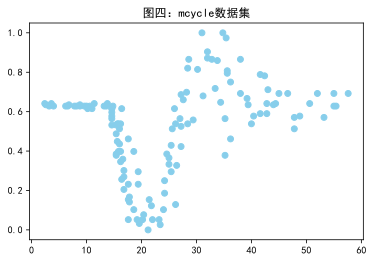

In [1]:
import matplotlib.pyplot as plt #配置绘图环境，支持中文、高分辨率图片
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format='svg'

import pandas as pd
import numpy as np
np.warnings.filterwarnings('ignore')

max_min_scaler=lambda x:(x-np.min(x))/(np.max(x)-np.min(x))
df=pd.read_csv('mcycle.csv')
df['accel']=df[['accel']].apply(max_min_scaler)
x=df['times'].values
y=df['accel'].values
plt.title("图四：mcycle数据集")
plt.scatter(x,y,c='skyblue')
plt.show()

* 局部多项式回归函数
    1. 采用了高斯核$w_j=\frac{e^{-\frac{(x_j-x_i)^2}{2 \sigma^2}}}{\sqrt{2\pi}\sigma}$
    2. 用矩阵的方式计算加权最小二乘法的系数为：$coef=(X^TWX)^{-1}X^TWY$

In [2]:
def local_polynomial_regression(y,x,width,sig):
    kernel=lambda x,c,sig: np.exp(-(x-x[c])**2/(2*(sig**2)))/(np.sqrt(2*np.pi)*sig) #高斯核
    for i in range(len(x)):
        #取得范围内的x,y
        x_window=x[max(0,i-width):min(len(x),i+width)]
        y_window=y[max(0,i-width):min(len(x),i+width)]
        weight=kernel(x,i,sig)#核加权
        weight_window=weight[max(0,i-width):min(len(x),i+width)]
        W=np.diag(weight_window)#将权重转化为斜对角矩阵
        
        #加权最小二乘法寻找最佳参数
        design_matrix=np.asmatrix(np.ones(len(x_window))).T #初始化
        for k in range(1,3):
            arr=np.asmatrix(np.power(x_window,k)).T #x^n的值
            design_matrix=np.concatenate((design_matrix,arr),axis=1)    
        coef=np.asarray((design_matrix.T*W*design_matrix).I*(design_matrix.T*W*(np.asmatrix(y_window).T)))#最小二乘估算系数
        
        y[i]=coef[2]*x[i]*x[i]+coef[1]*x[i]+coef[0] #多项式为ax^2+b^x+c，用最小二乘获得的最佳系数来计算新的y
    return y 


* 拟合数据分析结论
    1. 由于在[30,40]之间的数据点集中且变化区间大，所以即使调大了窗宽仍然存在较为严重的过拟合，因此进行两次局部多项式回归，可以降低模型过拟合的情况
    2. 绘出预测的曲线，可以看到有较好的效果
    3. 计算RMSE，为0.1096，效果较为理想。

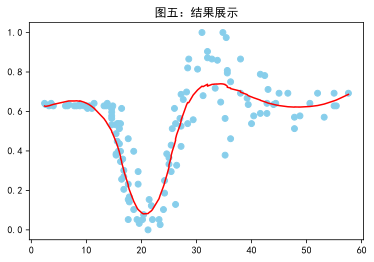

RMSE为： 0.10959276682861045


In [3]:
y=local_polynomial_regression(y,x,20,15)
y=local_polynomial_regression(y,x,20,15) #做两次对过拟合状态有很好的缓解
df=pd.read_csv('mcycle.csv')
df['accel']=df[['accel']].apply(max_min_scaler)
plt.scatter(df['times'].values,df['accel'].values,c='skyblue')
plt.plot(x,y,c='r')
plt.title("图五：结果展示")
plt.show()

from sklearn import metrics
df=pd.read_csv('mcycle.csv')
df['accel']=df[['accel']].apply(max_min_scaler)
y_true=df['accel'].values
print('RMSE为：',np.sqrt(metrics.mean_squared_error(y_true,y)))

## 题二 使用多元自适应回归样条预测医疗费用
* 背景：保险公司通常需要募集比花费在受益者的医疗服务上更多的年度保费. 因此, 精确预测医疗费用对保险公司具有重要价值. 本案例提供的数据集是从美国人口普查局的人口统计资料整理得出. 数据集共有1338个样本, 包含7个特征. 特征的具体信息如下表所示.请将’charges’作为目标特征, 构建回归模型并分析拟合的结果, 预测受益者的平均医疗费用
  
|表1|医疗费用数据集特征|
|:---|:---|
|特征名称|特征说明|
|age|受益者年龄|
|sex|保单持有人性别|
|bmi|身体健康指数|
|children|保险计划中所包含的孩子/受抚养者的数量|
|smoke|被保险人是否吸烟|
|region|受益人的居住地|
|charges|已结算的医疗费用|

* 环境初始化及数据处理
    1. 配置绘图环境，支持中文、高分辨率图片，由于这些在上面的T1中已经导入了，这里就不在重复导入了
    2. 读入数据，并对数据做归一化处理，这里采用了minmax归一化
    3. 将数据中的文字数据转换为01向量
    4. 划分数据集为80%训练集，20%测试集

In [4]:
from sklearn.model_selection import train_test_split
df=pd.read_csv('insurance.csv')
df=pd.get_dummies(df)
max_min_scaler=lambda x:(x-np.min(x))/(np.max(x)-np.min(x))
y=df[['charges']].apply(max_min_scaler)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
del df['charges']
x=df
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1070, 11) (1070, 1) (268, 11) (268, 1)


* 构建并训练多元自适应回归样条模型
    1. 使用库构建MARS模型，库基于：http://contrib.scikit-learn.org/py-earth/ 
    2. 输出在训练集上的回归情况：可以看到模型尝试了不同的分区方式并进行剪枝，使得最后达到了较为优秀的结果

In [6]:
from pyearth import Earth

model = Earth()
model.fit(x_train,y_train)

print(model.trace())
print(model.summary())

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.036952  1      0.037  0.000  0.000  
1     0       5    -1    0.014416  2      0.015  0.610  0.608  
2     0       0    -1    0.010628  3      0.011  0.712  0.710  
3     0       1    22    0.009608  5      0.010  0.740  0.735  
4     0       2    -1    0.009499  6      0.010  0.743  0.737  
5     0       8    -1    0.009482  7      0.010  0.743  0.736  
---------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   7      0.01  0.010  0.743  0.736  
1     6   6      0.01  0.010  0.743  0.737  
2     3   5      0.01  0.010  0.742  0.737  
3     5   4  

* 使用测试集验证数据并且可视化结果
    1. 首先检验了RMSE为：0.09，对于一个非线性回归来说效果是令人满意的
    2. 将结果可视化，其中，转化为01向量的数据需要合并再可视化，从图中（尤其是age和bmi）可以看出，多元自适应回归样条可以顺利的根据数据进行分区拟合，比线性回归的效果更好

RMSE为： 0.09277598251439462


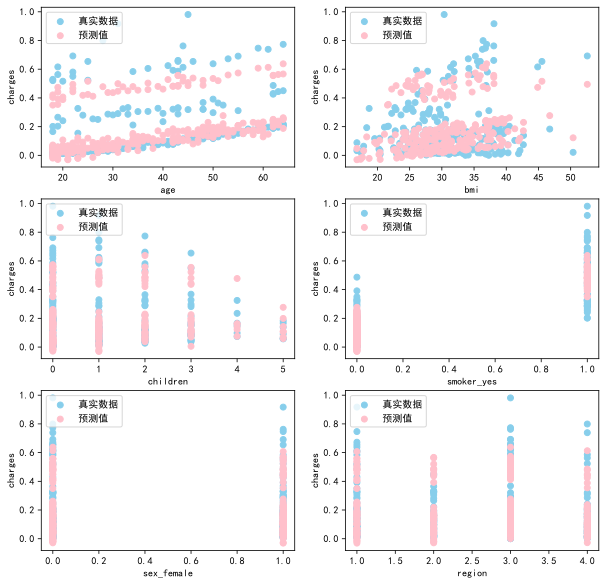

In [7]:
from sklearn import metrics
y_hat = model.predict(x_test)
print('RMSE为：',np.sqrt(metrics.mean_squared_error(y_hat,y_test)))
name=['age','bmi','children','smoker_yes','sex_female']

plt.figure(figsize=(10, 10))
for i in range(len(name)):
    x_=x_test[name[i]]
    plt.subplot(3,2,i+1)
    plt.scatter(x_,y_test,c='skyblue')
    plt.scatter(x_,y_hat,c='pink')
    plt.xlabel(name[i])
    plt.ylabel('charges')
    plt.legend(labels=['真实数据','预测值'],loc='upper left')
location=x_test['region_northeast']
for i in range(len(location)):
    if(location.iloc[i]==0):
        if(x_test['region_northwest'].iloc[i]==1):
            location.iloc[i]=2
        elif(x_test['region_southeast'].iloc[i]==1):
            location.iloc[i]=3
        elif(x_test['region_southwest'].iloc[i]==1):
            location.iloc[i]=4
plt.subplot(3,2,6)
plt.scatter(location,y_test,c='skyblue')
plt.scatter(location,y_hat,c='pink')
plt.xlabel('region')
plt.ylabel('charges')
plt.legend(labels=['真实数据','预测值'],loc='upper left')
plt.show()